<a href="https://colab.research.google.com/github/iamviji/project/blob/master/Report/KerasOneHot_PSK8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy
import time
import tensorflow as tf


from tensorflow.keras.layers import Input, Dense, GaussianNoise
from tensorflow.keras import Model
from keras.layers.normalization import BatchNormalization




NUM_OF_INPUT_MESSAGE = 1000
NUM_OF_INPUT_MESSAGE10 = 10*1000
SNR_STEP_SIZE = .5

SNR_BEGIN = 0
SNR_END = 10

bler_per_iter_uncoded_commpy_psk_2 = [0.521, 0.473, 0.436, 0.37,  0.304, 0.259, 0.187, 0.138, 0.098, 0.098, 0.052, 0.028, 0.012, 0.011, 0.009, 0.002, 0.0,  0.001, 0.,    0.0]
bler_per_iter_uncoded_itpp_psk_2 = [0.518, 0.478, 0.415, 0.355, 0.305, 0.227, 0.177, 0.149, 0.11,  0.075, 0.055, 0.023, 0.014, 0.014, 0.015, 0.001, 0.003, 0.001, 0.,    0. ]
bler_per_iter_uncoded_commpy_psk_4 = [0.815, 0.793, 0.75,  0.714, 0.64,  0.639, 0.526, 0.49,  0.433, 0.371, 0.335, 0.236, 0.204, 0.154, 0.129, 0.08,  0.063, 0.046, 0.023, 0.018]
bler_per_iter_uncoded_itpp_psk_4 = [0.814, 0.767, 0.729, 0.702, 0.66,  0.616, 0.563, 0.511, 0.442, 0.4,   0.294, 0.277, 0.228, 0.17,  0.114, 0.087, 0.05,  0.037, 0.022, 0.017]
bler_per_iter_ldpc_itpp_psk_4 = [0.584, 0.488, 0.404, 0.332, 0.218, 0.151, 0.097, 0.058, 0.041, 0.024, 0.007, 0.004, 0.002, 0.001, 0.001, 0.,    0.,    0.,    0.,    0.,   ]
bler_per_iter_ham_itpp_psk_4 = [0.51, 0.479, 0.419, 0.333, 0.313, 0.247, 0.212, 0.132, 0.114, 0.093, 0.042, 0.027, 0.024, 0.016, 0.006, 0.005, 0.003, 0.002, 0.,    0.  ]
bler_per_iter_uncoded_itpp_psk_8 = [0.921, 0.917, 0.912, 0.867, 0.86,  0.857, 0.826, 0.808, 0.77,  0.737, 0.704, 0.657, 0.608, 0.6,   0.547, 0.487, 0.426, 0.361, 0.323, 0.293]
bler_per_iter_uncoded_commpy_psk_8 = [0.923, 0.912, 0.891, 0.888, 0.874, 0.851, 0.804, 0.779, 0.758, 0.736, 0.715, 0.643, 0.614, 0.557, 0.542, 0.503, 0.431, 0.386, 0.331, 0.289]

ber_per_iter_uncoded_itpp_psk_2 = [0.07933333, 0.067, 0.058, 0.04811111, 0.039, 0.02911111, 0.02211111, 0.01833333, 0.01266667, 0.00866667, 0.00622222, 0.00255556, 0.00166667, 0.00155556, 0.00166667, 0.00011111, 0.00033333, 0.00011111, 0., 0.]
ber_per_iter_uncoded_commpy_psk_2 = [0.07955556, 0.07055556, 0.05344444, 0.04477778, 0.03644444, 0.02888889, 0.02055556, 0.01955556, 0.01033333, 0.00855556, 0.00522222, 0.004, 0.00188889, 0.00155556, 0.00055556, 0.00066667, 0.00022222, 0.00011111, 0., 0.]
ber_per_iter_uncoded_itpp_psk_4 = [0.1559, 0.1421, 0.1248, 0.1137, 0.1031, 0.0924, 0.0802, 0.0684, 0.055,  0.0499, 0.0348, 0.0336, 0.0257, 0.0185, 0.0121, 0.0092, 0.0054, 0.0037, 0.0022, 0.0017]
ber_per_iter_uncoded_commpy_psk_4 = [0.2137, 0.1943, 0.1773, 0.1624, 0.1473, 0.1355, 0.1105, 0.0984, 0.0873, 0.0686, 0.0573, 0.0454, 0.0356, 0.024,  0.0214, 0.0142, 0.0111, 0.0055, 0.0038, 0.002]
ber_per_iter_uncoded_itpp_psk_8 = [0.24566667, 0.23411111, 0.21455556, 0.19888889, 0.188, 0.184, 0.16355556, 0.15655556, 0.13777778, 0.12966667, 0.115, 0.10622222, 0.09211111, 0.088, 0.07622222, 0.06855556, 0.05677778, 0.04755556, 0.04188889, 0.03577778]
ber_per_iter_uncoded_commpy_psk_8 = [0.32577778, 0.31533333, 0.30455556, 0.29644444, 0.27955556, 0.266, 0.24677778, 0.23411111, 0.22088889, 0.209,      0.19577778, 0.17544444, 0.15844444, 0.13966667, 0.13533333, 0.12077778, 0.10211111, 0.09066667, 0.07544444, 0.06355556]
ber_per_iter_ldpc_itpp_psk_4 = [1.25444444e-01, 1.19111111e-01, 9.48888889e-02, 7.54444444e-02, 5.50000000e-02, 3.86666667e-02, 2.51111111e-02, 1.53333333e-02, 1.04444444e-02, 1.22222222e-03, 2.88888889e-03, 0.00000000e+00, 1.11111111e-04, 3.33333333e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]


import numpy as np #for numerical computing
import matplotlib.pyplot as plt #for plotting functions
from scipy.special import erfc
import math
#ref : https://core.ac.uk/download/pdf/235049678.pdf
EbN0dBs = np.arange(start=0,stop = 10.5, step = .5)
PSK_2_BER_theory = 0.5*erfc(np.sqrt(10**(EbN0dBs/10)))
M=4
#QAM_BER_theory = 2*(1-np.sqrt(1/M))*erfc(np.sqrt(10**(EbN0dBs/10)))
QAM_BER_theory = erfc(np.sqrt(math.log2(M)*3/(2*(M-1)))*np.sqrt(10**(EbN0dBs/10)))
PSK_4_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))
M=8
PSK_8_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))
QAM_8_BER_theory = 2*erfc(np.sqrt(math.log2(M)*3/(2*(M-1)))*np.sqrt(10**(EbN0dBs/10)))
M=16
PSK_16_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))
#QAM_16_BER_theory = 2*erfc(np.sqrt(math.log2(M)*3/(2*(M-1)))*np.sqrt(10**(EbN0dBs/10)))
QAM_16_BER_theory = (3.0/2)*erfc(np.sqrt((4.0/10))*np.sqrt(10**(EbN0dBs/10)))
                     #(3.0/2)*special.erfc(np.sqrt((4.0/10)*10.**(ebno/10)))
M=32
PSK_32_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))


def Snr2Sigma(snr):
  sigma = 10 ** (- snr / 20)
  return sigma


def timer_update(i,current,time_tot,tic_incr=500):
    last = current
    current = time.time()
    t_diff = current-last
    print('SNR: {:04.3f} - Iter: {} - Last {} iterations took {:03.2f}s'.format(snr,i+1,tic_incr,t_diff))
    return time_tot + t_diff



In [2]:
def conv_to_binary_from_decimal (decimal,input_message_size, input_message_length):
  binary = numpy.random.randint(1, size=(input_message_size,input_message_length))
  for i in range (input_message_size):
    bin = [int(x) for x in list('{0:0b}'.format(decimal[0][i]))]
    #print(bin)
    for j in range (len(bin)):
      offset = input_message_length - len(bin)
      #print ("x",offset)
      binary [i][j+offset] = bin [j]
  return binary

def GetBerBler (input_message_binary1, input_message_binary2):
  diff = abs(input_message_binary1 - input_message_binary2)
  field_sum = numpy.sum (diff, axis=1)
  field_sum = numpy.reshape (field_sum, (-1,1))
  ber = numpy.sum(field_sum)/(input_message_binary1.shape[0]*input_message_binary1.shape[1])
  field_non_zero_count = numpy.count_nonzero(field_sum != 0, axis=1)
  bler = numpy.sum(field_non_zero_count)/field_non_zero_count.shape[0]
  return ber, bler

def get_onehot_ber_bler_of_model (snr_list, encoder, decoder, input_onehot, input_binary, num_of_input_msg, input_message_length, channel_size, verbose=1):
  bler_per_iter_dl_tensor  = numpy.array(())
  ber_per_iter_dl_tensor  = numpy.array(())
  channel_out = []
  encoded_message = encoder.predict(input_onehot)
  for snr in snr_list:
    total_bit_error = 0
    total_msg_error = 0    
    sigma = Snr2Sigma (snr)
    noised_message = encoded_message + numpy.random.normal(0, sigma, encoded_message.shape)
    for i in range (num_of_input_msg):
      noised_message[i] = encoded_message[i] + numpy.random.normal(0, sigma, [1,2*channel_size])
      channel_out.append(noised_message[i])
    decoded_message = decoder.predict(noised_message)
    decoded_message_decimal = []
    decoded_message_decimal.append(numpy.argmax(decoded_message, axis=1))
    decoded_message_binary = conv_to_binary_from_decimal (decoded_message_decimal, num_of_input_msg,  input_message_length)
    ber,bler = GetBerBler (input_binary, decoded_message_binary)
    print('SNR: {:04.3f}:-> BLER: {:03.3f} BER: {:03.3f}'.format(snr,bler,ber))
    bler_per_iter_dl_tensor = numpy.append(bler_per_iter_dl_tensor, bler)
    ber_per_iter_dl_tensor = numpy.append(ber_per_iter_dl_tensor, ber)
  return ber_per_iter_dl_tensor, bler_per_iter_dl_tensor, channel_out

def display_points (encoded_message, display_sample, channel_size, width=2, height=2):
  fig, axs = plt.subplots(display_sample,channel_size, sharex=True, sharey=True,  figsize=(channel_size*width/2,display_sample*height/2))
  for i in  range (display_sample):
    for j in range (channel_size):
      x = [-1*width,-.5,0,0.5,width]
      y = [-0,0,0,0,0]
      axs[i][j].plot(x, y, '-')
      y = [-1*height,-.5,0,0.5,height]
      x = [0,0,0,0,0]
      axs[i][j].plot(x, y, '-')
      x = []
      y = [ ]
      x.append (encoded_message[i][j*2])
      y.append (encoded_message[i][j*2+1])
      axs[i][j].plot(x, y, 'o')

In [3]:

snr_std = 7.0
input_message_length = 3
encoder_output_length = 0
channel_size = 1

input_message_x = Input(shape=(2**input_message_length,))
# "encoded" is the encoded representation of the input
#enc_layer1 = Dense(encoder_output_length, activation='tanh')(input_message_x)
enc_layer2 = Dense(2*channel_size, activation='tanh')(input_message_x)
enc_layer3 =  enc_layer2 / tf.sqrt(tf.reduce_mean(tf.square(enc_layer2)))
encoder = Model(input_message_x, enc_layer3)

awgn_channel = GaussianNoise(Snr2Sigma(snr_std),input_shape=(2*channel_size,))

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(2*channel_size,))
#dec_layer1 = Dense(encoder_output_length, activation='tanh')(encoded_input)
dec_layer2 = Dense(2**input_message_length, activation="softmax")(encoded_input)
# this model maps an encoded input to its decoder representation
decoder = Model(encoded_input, dec_layer2)

# this model maps an input to its reconstruction
autoencoder = Model(input_message_x, decoder(awgn_channel(encoder(input_message_x))))


print(encoder.summary())
print(decoder.summary())
print(autoencoder.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 2)            18          input_1[0][0]                    
__________________________________________________________________________________________________
tf.math.square (TFOpLambda)     (None, 2)            0           dense[0][0]                      
__________________________________________________________________________________________________
tf.math.reduce_mean (TFOpLambda ()                   0           tf.math.square[0][0]             
______________________________________________________________________________________________

In [4]:
training_input_message = numpy.random.randint(2**input_message_length, size=(1,NUM_OF_INPUT_MESSAGE*10))
training_input_message_binary = conv_to_binary_from_decimal (training_input_message,NUM_OF_INPUT_MESSAGE*10,  input_message_length)
training_input_message_one_hot = numpy.zeros((training_input_message.size, 2**input_message_length))
training_input_message_one_hot[numpy.arange(training_input_message.size),training_input_message] = 1
print(training_input_message_one_hot)
print (training_input_message_one_hot.shape)
print (training_input_message.shape)

test_input_message = numpy.random.randint(2**input_message_length, size=(1,NUM_OF_INPUT_MESSAGE*2))
test_input_message_binary = conv_to_binary_from_decimal (test_input_message,NUM_OF_INPUT_MESSAGE*2,  input_message_length)
test_input_message_one_hot = numpy.zeros((test_input_message.size, 2**input_message_length))
test_input_message_one_hot[numpy.arange(test_input_message.size),test_input_message] = 1
print(test_input_message_one_hot)
print (test_input_message_one_hot.shape)
print (test_input_message.shape)

training_input_message_label = training_input_message.reshape(training_input_message.shape[1])
print (training_input_message)
print (training_input_message_label)
test_input_message_label = test_input_message.reshape(test_input_message.shape[1])
print (test_input_message)
print (test_input_message_label)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(10000, 8)
(1, 10000)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
(2000, 8)
(1, 2000)
[[6 7 1 ... 0 3 3]]
[6 7 1 ... 0 3 3]
[[5 2 4 ... 7 1 7]]
[5 2 4 ... 7 1 7]


In [5]:
import keras
#Note : 3rd Round
#def custom_losff_fucntion (act, pred):
#  return (tf.reduce_mean(-1*(act * tf.log(pred) + (1-act)*tf.log(1-pred))))

#opt = keras.optimizers.Adam(learning_rate=1)
#autoencoder.compile(optimizer=opt, loss='binary_crossentropy')
#loss_fn = keras.losses.SparseCategoricalCrossentropy()
autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
training_history1 = dict ()
for snr in (numpy.arange (0, 10, SNR_STEP_SIZE)):
  sigma = 1.0*Snr2Sigma (snr)
  snr_std = sigma
  print ("Training for SNR=", snr, " sigma=", sigma) 
  autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
  history = autoencoder.fit(training_input_message_one_hot, training_input_message_label,
                epochs=20,#original
                batch_size=500,
                shuffle=False,
                validation_data=(test_input_message_one_hot, test_input_message_label))
  training_history1 [snr] = history

Training for SNR= 0.0  sigma= 1.0
Epoch 1/20
20/20 [==============================] - 1s 19ms/step - loss: 2.1306 - sparse_categorical_accuracy: 0.1578 - val_loss: 1.6475 - val_sparse_categorical_accuracy: 0.4965
Epoch 2/20
20/20 [==============================] - 0s 3ms/step - loss: 1.5899 - sparse_categorical_accuracy: 0.4695 - val_loss: 1.3491 - val_sparse_categorical_accuracy: 0.8695
Epoch 3/20
20/20 [==============================] - 0s 3ms/step - loss: 1.3501 - sparse_categorical_accuracy: 0.6830 - val_loss: 1.1854 - val_sparse_categorical_accuracy: 0.8695
Epoch 4/20
20/20 [==============================] - 0s 2ms/step - loss: 1.2131 - sparse_categorical_accuracy: 0.7055 - val_loss: 1.0647 - val_sparse_categorical_accuracy: 0.8695
Epoch 5/20
20/20 [==============================] - 0s 2ms/step - loss: 1.1195 - sparse_categorical_accuracy: 0.7216 - val_loss: 0.9722 - val_sparse_categorical_accuracy: 0.8695
Epoch 6/20
20/20 [==============================] - 0s 3ms/step - loss: 1.0

In [6]:
ber_per_iter_dl_tensor1, bler_per_iter_dl_tensor1, channel_out1  = get_onehot_ber_bler_of_model (numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE), 
          encoder, decoder, 
          training_input_message_one_hot, 
          training_input_message_binary, 
          training_input_message_binary.shape[0], input_message_length,channel_size)
print (ber_per_iter_dl_tensor1)
print (bler_per_iter_dl_tensor1)

SNR: 0.000:-> BLER: 0.547 BER: 0.305
SNR: 0.500:-> BLER: 0.523 BER: 0.286
SNR: 1.000:-> BLER: 0.503 BER: 0.277
SNR: 1.500:-> BLER: 0.477 BER: 0.261
SNR: 2.000:-> BLER: 0.442 BER: 0.242
SNR: 2.500:-> BLER: 0.427 BER: 0.234
SNR: 3.000:-> BLER: 0.395 BER: 0.213
SNR: 3.500:-> BLER: 0.364 BER: 0.195
SNR: 4.000:-> BLER: 0.337 BER: 0.181
SNR: 4.500:-> BLER: 0.311 BER: 0.161
SNR: 5.000:-> BLER: 0.280 BER: 0.146
SNR: 5.500:-> BLER: 0.249 BER: 0.129
SNR: 6.000:-> BLER: 0.221 BER: 0.113
SNR: 6.500:-> BLER: 0.186 BER: 0.094
SNR: 7.000:-> BLER: 0.179 BER: 0.088
SNR: 7.500:-> BLER: 0.141 BER: 0.069
SNR: 8.000:-> BLER: 0.121 BER: 0.060
SNR: 8.500:-> BLER: 0.100 BER: 0.048
SNR: 9.000:-> BLER: 0.087 BER: 0.042
SNR: 9.500:-> BLER: 0.067 BER: 0.031
[0.30463333 0.2865     0.27723333 0.26106667 0.24246667 0.23353333
 0.21303333 0.19493333 0.18073333 0.16126667 0.14613333 0.12923333
 0.11283333 0.0942     0.08843333 0.06853333 0.05976667 0.04793333
 0.04236667 0.0311    ]
[0.547  0.5231 0.5031 0.4774 0.4424

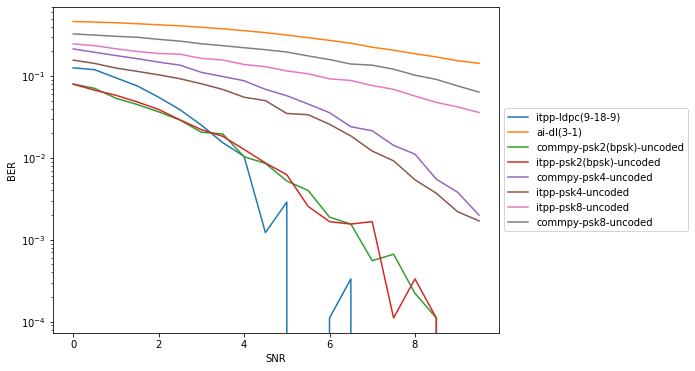

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,ber_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor1,'', label="ai-dl(3-1)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_2_BER_theory[0:20],'', label="psk2-theory") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_4_BER_theory[0:20],'', label="psk4-theory") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_8_BER_theory[0:20],'', label="psk8-theory") # plot BER vs SNR
ax1.set_ylabel('BER')
ax1.set_xlabel('SNR')
#ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

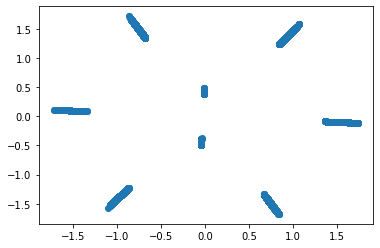

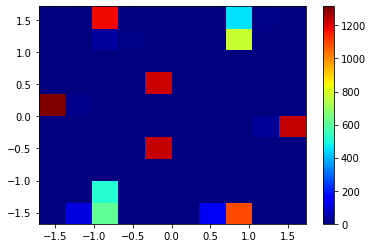

In [8]:
import matplotlib.pyplot as plt
encoded_message = encoder.predict(training_input_message_one_hot)
channel_in_array = numpy.transpose(encoded_message)
for i in range (int(channel_size)):
  plt.scatter(channel_in_array[i*2], channel_in_array[i*2+1])
  plt.show()
  plt.hist2d(channel_in_array[i*2], channel_in_array[i*2+1], cmap=plt.cm.jet)
  plt.colorbar()
  plt.show()

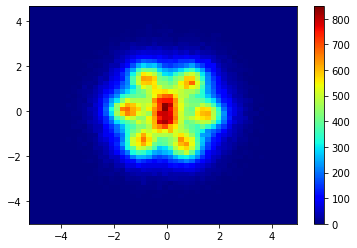

In [9]:
channel_out_array = numpy.transpose(channel_out1)

for i in range (int(channel_size)):
  plt.hist2d(channel_out_array[2*i], channel_out_array[2*i+1], (50, 50), cmap=plt.cm.jet)
  plt.colorbar()
  plt.show()

In [10]:
ber_per_iter_dl_tensor, bler_per_iter_dl_tensor, _  = get_onehot_ber_bler_of_model (numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE), 
          encoder, decoder, 
          test_input_message_one_hot, 
          test_input_message_binary, 
          NUM_OF_INPUT_MESSAGE*2, input_message_length,channel_size)
print (ber_per_iter_dl_tensor)
print (bler_per_iter_dl_tensor)

SNR: 0.000:-> BLER: 0.524 BER: 0.291
SNR: 0.500:-> BLER: 0.514 BER: 0.281
SNR: 1.000:-> BLER: 0.488 BER: 0.262
SNR: 1.500:-> BLER: 0.480 BER: 0.263
SNR: 2.000:-> BLER: 0.430 BER: 0.237
SNR: 2.500:-> BLER: 0.438 BER: 0.231
SNR: 3.000:-> BLER: 0.396 BER: 0.213
SNR: 3.500:-> BLER: 0.370 BER: 0.198
SNR: 4.000:-> BLER: 0.341 BER: 0.179
SNR: 4.500:-> BLER: 0.301 BER: 0.157
SNR: 5.000:-> BLER: 0.272 BER: 0.137
SNR: 5.500:-> BLER: 0.237 BER: 0.122
SNR: 6.000:-> BLER: 0.211 BER: 0.109
SNR: 6.500:-> BLER: 0.195 BER: 0.098
SNR: 7.000:-> BLER: 0.170 BER: 0.086
SNR: 7.500:-> BLER: 0.148 BER: 0.072
SNR: 8.000:-> BLER: 0.128 BER: 0.062
SNR: 8.500:-> BLER: 0.107 BER: 0.052
SNR: 9.000:-> BLER: 0.087 BER: 0.043
SNR: 9.500:-> BLER: 0.069 BER: 0.031
[0.29066667 0.28116667 0.26216667 0.2625     0.23666667 0.23133333
 0.21283333 0.19816667 0.1795     0.1565     0.13733333 0.12183333
 0.10916667 0.09766667 0.0855     0.07233333 0.062      0.05183333
 0.0425     0.03133333]
[0.5245 0.514  0.4885 0.4805 0.4305

Text(0, 0.5, 'Loss')

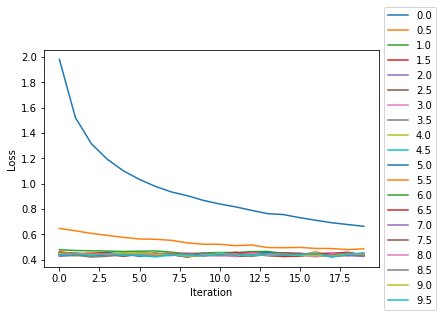

In [11]:
for snr in (numpy.arange (0, 10, SNR_STEP_SIZE)):
  plt.plot(training_history1[snr].history['loss'], label=snr)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel ("Iteration")
plt.ylabel ("Loss")

1.3175284
1.5416733


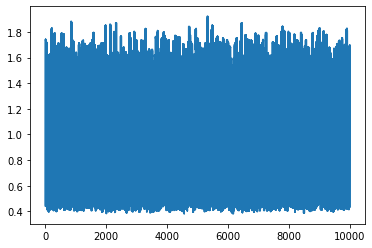

In [12]:
encoded_message = encoder.predict(training_input_message_one_hot)
x = numpy.sqrt(numpy.sum (numpy.square(encoded_message), axis=1))
plt.plot(x)
print (numpy.mean(x))
print (numpy.max(x) - numpy.min(x))

In [13]:

snr_std = 7
input_message_length = 12
encoder_output_length = 0
channel_size = 4

input_message_x = Input(shape=(2**input_message_length,))
# "encoded" is the encoded representation of the input
#enc_layer1 = Dense(encoder_output_length, activation='tanh')(input_message_x)
enc_layer2 = Dense(2*channel_size, activation='tanh')(input_message_x)
enc_layer3 =  enc_layer2 / tf.sqrt(tf.reduce_mean(tf.square(enc_layer2)))
encoder = Model(input_message_x, enc_layer3)

awgn_channel = GaussianNoise(Snr2Sigma(snr_std),input_shape=(2*channel_size,))

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(2*channel_size,))
#dec_layer1 = Dense(encoder_output_length, activation='tanh')(encoded_input)
dec_layer2 = Dense(2**input_message_length, activation="softmax")(encoded_input)
# this model maps an encoded input to its decoder representation
decoder = Model(encoded_input, dec_layer2)

# this model maps an input to its reconstruction
autoencoder = Model(input_message_x, decoder(awgn_channel(encoder(input_message_x))))


print ("encoder.summary")
print(encoder.summary())
print ("")
print ("decoder.summary")
print(decoder.summary())
print ("")
print ("autoencoder.summary")
print(autoencoder.summary())

encoder.summary
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 4096)]       0                                            
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 8)            32776       input_3[0][0]                    
__________________________________________________________________________________________________
tf.math.square_1 (TFOpLambda)   (None, 8)            0           dense_2[0][0]                    
__________________________________________________________________________________________________
tf.math.reduce_mean_1 (TFOpLamb ()                   0           tf.math.square_1[0][0]           
____________________________________________________________________________

In [14]:
training_input_message = numpy.random.randint(2**input_message_length, size=(1,NUM_OF_INPUT_MESSAGE10))
training_input_message_binary = conv_to_binary_from_decimal (training_input_message,NUM_OF_INPUT_MESSAGE10,  input_message_length)
training_input_message_one_hot = numpy.zeros((training_input_message.size, 2**input_message_length))
training_input_message_one_hot[numpy.arange(training_input_message.size),training_input_message] = 1
print(training_input_message_one_hot)
print (training_input_message_one_hot.shape)
print (training_input_message.shape)

test_input_message = numpy.random.randint(2**input_message_length, size=(1,NUM_OF_INPUT_MESSAGE*2))
test_input_message_binary = conv_to_binary_from_decimal (test_input_message,NUM_OF_INPUT_MESSAGE*2,  input_message_length)
test_input_message_one_hot = numpy.zeros((test_input_message.size, 2**input_message_length))
test_input_message_one_hot[numpy.arange(test_input_message.size),test_input_message] = 1
print(test_input_message_one_hot)
print (test_input_message_one_hot.shape)
print (test_input_message.shape)

training_input_message_label = training_input_message.reshape(training_input_message.shape[1])
print (training_input_message)
print (training_input_message_label)
test_input_message_label = test_input_message.reshape(test_input_message.shape[1])
print (test_input_message)
print (test_input_message_label)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(10000, 4096)
(1, 10000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(2000, 4096)
(1, 2000)
[[2878 3797  239 ... 3875 1637 1293]]
[2878 3797  239 ... 3875 1637 1293]
[[2908 3078 3049 ... 2748 2474 1586]]
[2908 3078 3049 ... 2748 2474 1586]


In [15]:
import keras
autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
training_history2 = dict ()
for snr in (numpy.arange (0, 10, SNR_STEP_SIZE)):
  sigma = 1.0*Snr2Sigma (snr)
  snr_std = snr
  print ("Training for SNR=", snr, " sigma=", sigma) 
  #awgn_channel = GaussianNoise(Snr2Sigma(snr_std),input_shape=(2*channel_size,))
  #autoencoder = Model(input_message_x, decoder(awgn_channel(encoder(input_message_x))))
  autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
  history = autoencoder.fit(training_input_message_one_hot, training_input_message_label,
                epochs=10,#original
                batch_size=500,
                shuffle=False,
                validation_data=(test_input_message_one_hot, test_input_message_label))
  training_history2 [snr] = history

Training for SNR= 0.0  sigma= 1.0
Epoch 1/10
20/20 [==============================] - 1s 53ms/step - loss: 8.2258 - sparse_categorical_accuracy: 0.0230 - val_loss: 7.9644 - val_sparse_categorical_accuracy: 0.0320
Epoch 2/10
20/20 [==============================] - 1s 46ms/step - loss: 7.6742 - sparse_categorical_accuracy: 0.0876 - val_loss: 7.6195 - val_sparse_categorical_accuracy: 0.0370
Epoch 3/10
20/20 [==============================] - 1s 45ms/step - loss: 7.2149 - sparse_categorical_accuracy: 0.0868 - val_loss: 7.3161 - val_sparse_categorical_accuracy: 0.0390
Epoch 4/10
20/20 [==============================] - 1s 46ms/step - loss: 6.8167 - sparse_categorical_accuracy: 0.0897 - val_loss: 7.0588 - val_sparse_categorical_accuracy: 0.0435
Epoch 5/10
20/20 [==============================] - 1s 47ms/step - loss: 6.4782 - sparse_categorical_accuracy: 0.0950 - val_loss: 6.8497 - val_sparse_categorical_accuracy: 0.0470
Epoch 6/10
20/20 [==============================] - 1s 47ms/step - loss

In [16]:
ber_per_iter_dl_tensor1, bler_per_iter_dl_tensor1, channel_out1  = get_onehot_ber_bler_of_model (numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE), 
          encoder, decoder, 
          training_input_message_one_hot, 
          training_input_message_binary, 
          training_input_message_binary.shape[0], input_message_length,channel_size)
print (ber_per_iter_dl_tensor)
print (bler_per_iter_dl_tensor)

SNR: 0.000:-> BLER: 0.921 BER: 0.462
SNR: 0.500:-> BLER: 0.905 BER: 0.454
SNR: 1.000:-> BLER: 0.889 BER: 0.446
SNR: 1.500:-> BLER: 0.865 BER: 0.434
SNR: 2.000:-> BLER: 0.841 BER: 0.420
SNR: 2.500:-> BLER: 0.820 BER: 0.408
SNR: 3.000:-> BLER: 0.784 BER: 0.392
SNR: 3.500:-> BLER: 0.751 BER: 0.376
SNR: 4.000:-> BLER: 0.711 BER: 0.357
SNR: 4.500:-> BLER: 0.677 BER: 0.338
SNR: 5.000:-> BLER: 0.632 BER: 0.315
SNR: 5.500:-> BLER: 0.586 BER: 0.293
SNR: 6.000:-> BLER: 0.545 BER: 0.272
SNR: 6.500:-> BLER: 0.502 BER: 0.251
SNR: 7.000:-> BLER: 0.452 BER: 0.224
SNR: 7.500:-> BLER: 0.414 BER: 0.206
SNR: 8.000:-> BLER: 0.374 BER: 0.187
SNR: 8.500:-> BLER: 0.341 BER: 0.171
SNR: 9.000:-> BLER: 0.306 BER: 0.153
SNR: 9.500:-> BLER: 0.285 BER: 0.143
[0.29066667 0.28116667 0.26216667 0.2625     0.23666667 0.23133333
 0.21283333 0.19816667 0.1795     0.1565     0.13733333 0.12183333
 0.10916667 0.09766667 0.0855     0.07233333 0.062      0.05183333
 0.0425     0.03133333]
[0.5245 0.514  0.4885 0.4805 0.4305

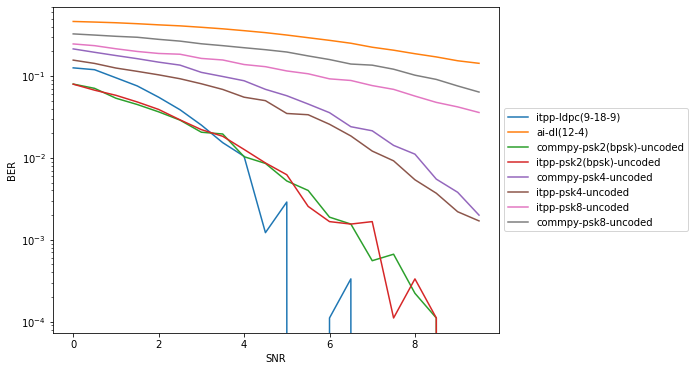

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,ber_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor1,'', label="ai-dl(12-4)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_2_BER_theory[0:20],'', label="psk2-theory") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_4_BER_theory[0:20],'', label="psk4-theory") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_8_BER_theory[0:20],'', label="psk8-theory") # plot BER vs SNR
ax1.set_ylabel('BER')
ax1.set_xlabel('SNR')
#ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

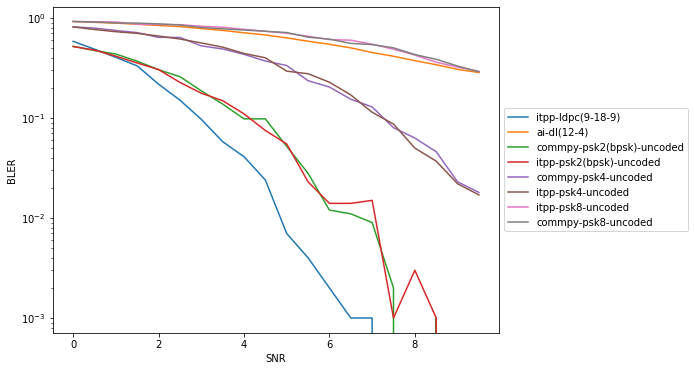

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,bler_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor1,'', label="ai-dl(12-4)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
ax1.set_ylabel('BLER')
ax1.set_xlabel('SNR')
#ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

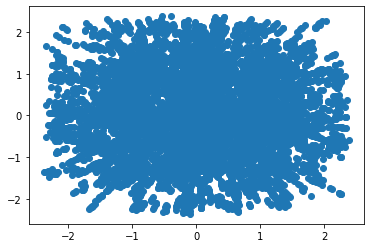

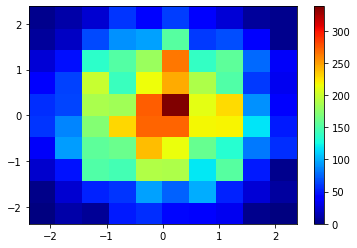

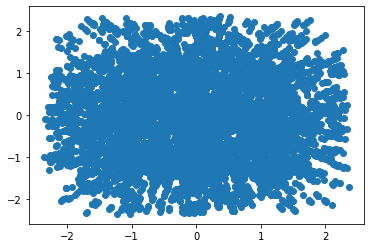

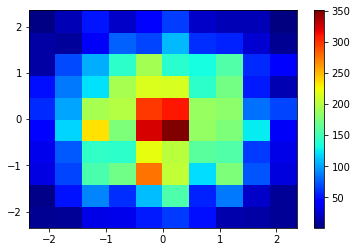

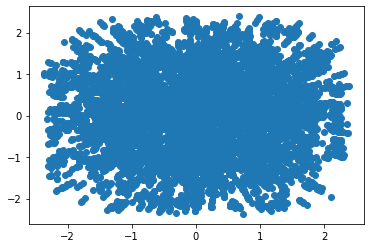

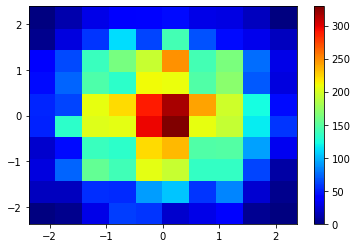

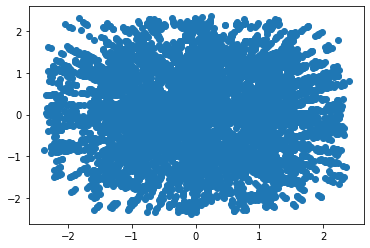

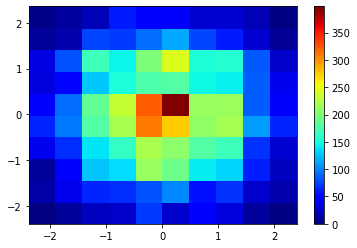

In [19]:
import matplotlib.pyplot as plt
encoded_message = encoder.predict(training_input_message_one_hot)
channel_in_array = numpy.transpose(encoded_message)
for i in range (int(channel_size)):
  plt.scatter(channel_in_array[i*2], channel_in_array[i*2+1])
  plt.show()
  plt.hist2d(channel_in_array[i*2], channel_in_array[i*2+1], cmap=plt.cm.jet)
  plt.colorbar()
  plt.show()

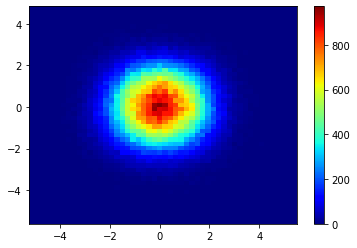

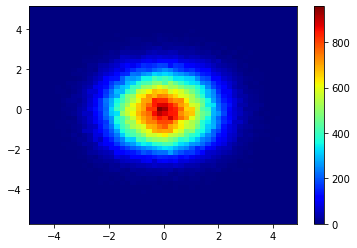

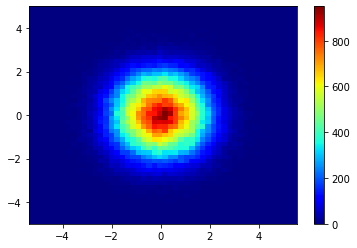

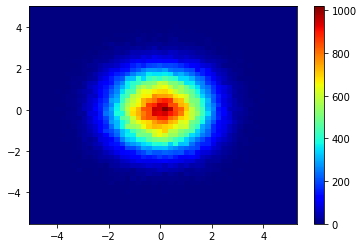

In [20]:
channel_out_array = numpy.transpose(channel_out1)

for i in range (int(channel_size)):
  plt.hist2d(channel_out_array[2*i], channel_out_array[2*i+1], (50, 50), cmap=plt.cm.jet)
  plt.colorbar()
  plt.show()

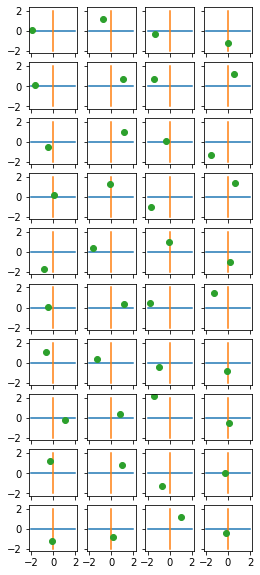

In [21]:
display_points (encoded_message, 10, channel_size, 2,2)


In [22]:
test_input_message = numpy.random.randint(2**input_message_length, size=(1,NUM_OF_INPUT_MESSAGE*2))
test_input_message_binary = conv_to_binary_from_decimal (test_input_message,NUM_OF_INPUT_MESSAGE*2,  input_message_length)
test_input_message_one_hot = numpy.zeros((test_input_message.size, 2**input_message_length))
test_input_message_one_hot[numpy.arange(test_input_message.size),test_input_message] = 1
print(test_input_message_one_hot)
print (test_input_message_one_hot.shape)
print (test_input_message.shape)

training_input_message_label = training_input_message.reshape(training_input_message.shape[1])
print (training_input_message)
print (training_input_message_label)
test_input_message_label = test_input_message.reshape(test_input_message.shape[1])
print (test_input_message)
print (test_input_message_label)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(2000, 4096)
(1, 2000)
[[2878 3797  239 ... 3875 1637 1293]]
[2878 3797  239 ... 3875 1637 1293]
[[3513 2228 1945 ...   96  126 2457]]
[3513 2228 1945 ...   96  126 2457]


In [23]:
ber_per_iter_dl_tensor2, bler_per_iter_dl_tensor2, channel_out2  = get_onehot_ber_bler_of_model (numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE), 
          encoder, decoder, 
          test_input_message_one_hot, 
          test_input_message_binary, 
          test_input_message_binary.shape[0], input_message_length,channel_size)
print (ber_per_iter_dl_tensor2)
print (bler_per_iter_dl_tensor2)

SNR: 0.000:-> BLER: 0.939 BER: 0.475
SNR: 0.500:-> BLER: 0.932 BER: 0.466
SNR: 1.000:-> BLER: 0.914 BER: 0.454
SNR: 1.500:-> BLER: 0.894 BER: 0.442
SNR: 2.000:-> BLER: 0.873 BER: 0.434
SNR: 2.500:-> BLER: 0.844 BER: 0.421
SNR: 3.000:-> BLER: 0.827 BER: 0.415
SNR: 3.500:-> BLER: 0.822 BER: 0.417
SNR: 4.000:-> BLER: 0.768 BER: 0.380
SNR: 4.500:-> BLER: 0.754 BER: 0.378
SNR: 5.000:-> BLER: 0.723 BER: 0.366
SNR: 5.500:-> BLER: 0.693 BER: 0.348
SNR: 6.000:-> BLER: 0.664 BER: 0.333
SNR: 6.500:-> BLER: 0.633 BER: 0.316
SNR: 7.000:-> BLER: 0.622 BER: 0.305
SNR: 7.500:-> BLER: 0.589 BER: 0.296
SNR: 8.000:-> BLER: 0.554 BER: 0.275
SNR: 8.500:-> BLER: 0.546 BER: 0.276
SNR: 9.000:-> BLER: 0.525 BER: 0.263
SNR: 9.500:-> BLER: 0.502 BER: 0.252
[0.47508333 0.46570833 0.454125   0.44191667 0.43429167 0.42104167
 0.41516667 0.41729167 0.38008333 0.37804167 0.36575    0.347625
 0.33266667 0.31591667 0.30520833 0.29604167 0.274625   0.27583333
 0.262875   0.25166667]
[0.939  0.932  0.9145 0.894  0.8725 0

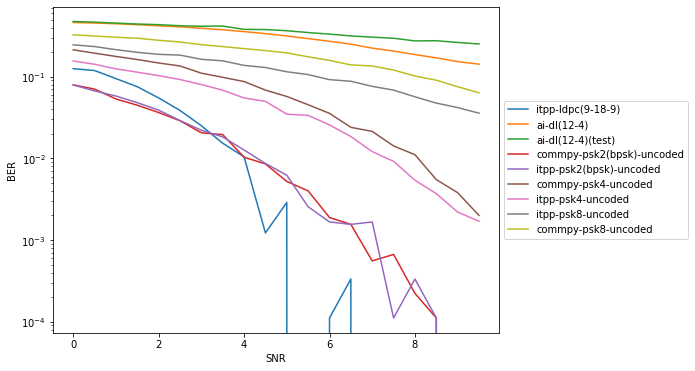

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,ber_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor1,'', label="ai-dl(12-4)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor2,'', label="ai-dl(12-4)(test)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_2_BER_theory[0:20],'', label="psk2-theory") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_4_BER_theory[0:20],'', label="psk4-theory") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_8_BER_theory[0:20],'', label="psk8-theory") # plot BER vs SNR
ax1.set_ylabel('BER')
ax1.set_xlabel('SNR')
#ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

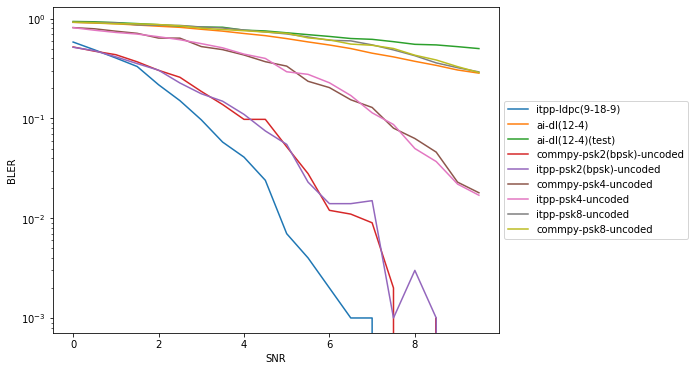

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,bler_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor1,'', label="ai-dl(12-4)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor2,'', label="ai-dl(12-4)(test)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
ax1.set_ylabel('BLER')
ax1.set_xlabel('SNR')
#ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Text(0, 0.5, 'Loss')

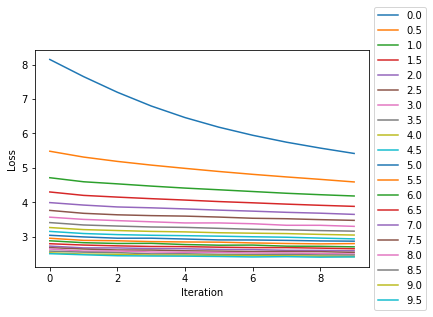

In [32]:
for snr in (numpy.arange (0, 10, SNR_STEP_SIZE)):
  plt.plot(training_history2[snr].history['loss'], label=snr)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel ("Iteration")
plt.ylabel ("Loss")

Observation:
above 10 crashes, training is slow